<font color="blue" size="6">Scaling and Standardization </font>
<p>When a dataset have values of different columns at drastically different scales, it gets tough to analyze the trends , patterns and comparison of the features or columns.
<p>So, in such cases where all the columns have a significant difference in their scales,that are needed to be modified in such a way that all those values fall into the same scale.</p>
<p><b>This process is called Scaling</b>


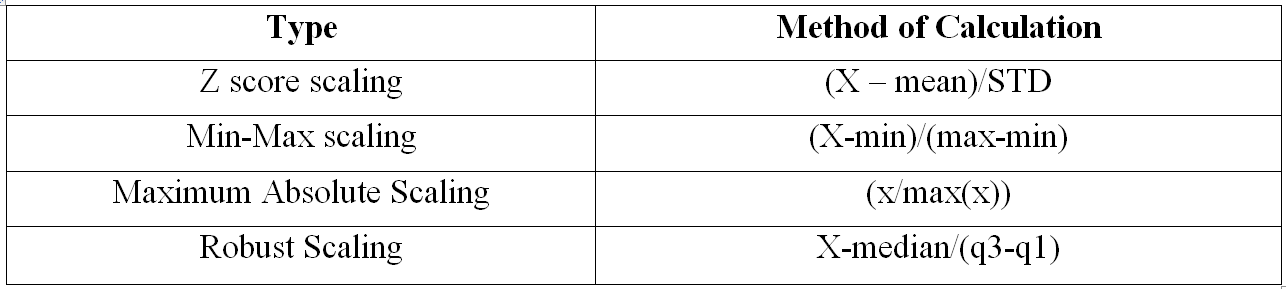

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('DATASETS\\hungary_chickenpox.csv')

In [2]:
df


,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,01/12/2014,95,12,41,6,39,0,16,15,14,...,56,7,13,122,4,23,4,11,110,10
518,08/12/2014,43,39,31,10,34,3,2,30,25,...,34,20,18,70,36,5,23,22,63,9
519,15/12/2014,35,7,15,0,0,0,7,7,4,...,30,36,4,72,5,21,14,0,17,10
520,22/12/2014,30,23,8,0,11,4,1,9,10,...,27,17,21,12,5,17,1,1,83,2


In [3]:
def z_score(x):
    return(x-np.mean(x))/np.std(x)

In [4]:
def minmax_scaling(x):
    return(x-np.min(x))/(np.max(x)-np.min(x))


In [5]:
def robust_scaling(x):
    return(x-np.median(x))/(x.quantile(q=.75)-(x.quantile(q=.25)))


In [6]:
def maximum_abs_scaling(x):
    return(x/(np.max(x)))


In [7]:
f=df.drop(columns="Date").apply(z_score,axis="rows")

In [8]:
f


,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,0.875109,1.376783,-0.194705,3.833962,2.208458,0.311379,3.274939,2.183538,2.578130,0.198209,2.392915,1.282753,-0.902098,1.377587,1.437932,1.074297,-0.402245,0.261484,1.140272,2.189700
1,0.730906,0.792814,-0.194705,1.678677,2.820177,0.637230,0.565163,0.793869,0.827998,-0.053149,1.050546,0.996391,0.324902,0.822945,0.763740,-0.026882,1.619197,1.222150,0.672987,0.278746
2,-0.068761,0.301052,-0.167537,1.519027,0.708758,-0.044094,1.904111,1.182976,3.228819,0.669503,0.620987,0.832755,-0.811209,1.062790,0.201913,0.098967,0.156877,-0.178821,0.525424,1.097726
3,0.809562,0.454727,0.158481,2.583365,-0.218687,0.222511,0.597042,2.016777,1.344063,0.386726,0.594140,1.160026,-0.356765,0.313275,1.437932,0.633825,0.199887,-0.058738,0.058140,0.506241
4,0.272081,1.346048,0.430163,1.545635,0.906087,0.074397,1.967871,2.489265,2.802505,0.323887,0.540445,0.955482,-0.493098,0.568110,1.325567,0.822599,-0.574283,0.981983,1.091084,1.825709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,-0.081870,-0.682474,0.104145,-0.609650,-0.356817,-0.932776,-0.550628,-0.734768,-0.742632,-0.618702,0.406208,-0.762693,-0.402209,0.538129,-0.884285,-0.215655,-0.703311,-0.459015,1.705932,-0.449236
518,-0.763554,0.147376,-0.167537,-0.503216,-0.455482,-0.843908,-0.996944,-0.317867,-0.495819,-0.335925,-0.184434,-0.230877,-0.174987,-0.241367,0.314279,-0.781975,0.113868,-0.018710,0.550018,-0.494735
519,-0.868429,-0.836150,-0.602228,-0.769300,-1.126400,-0.932776,-0.837545,-0.957115,-0.967008,-0.870059,-0.291824,0.423666,-0.811209,-0.211386,-0.846830,-0.278579,-0.273217,-0.899321,-0.581302,-0.449236
520,-0.933975,-0.344387,-0.792405,-0.769300,-0.909338,-0.814285,-1.028823,-0.901528,-0.832383,-0.398765,-0.372366,-0.353604,-0.038654,-1.110805,-0.846830,-0.404428,-0.832339,-0.859293,1.041896,-0.813227


In [9]:
f1=df.drop('Date', axis='columns').apply(minmax_scaling,axis="rows")

In [10]:
f1


,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,0.350731,0.407216,0.109489,0.638376,0.476056,0.211055,0.829268,0.662983,0.618321,0.171429,0.580357,0.35625,0.017857,0.412993,0.425806,0.315271,0.083969,0.205674,0.378261,0.314815
1,0.327766,0.309278,0.109489,0.339483,0.563380,0.266332,0.310976,0.386740,0.320611,0.133333,0.357143,0.31250,0.258929,0.327146,0.309677,0.142857,0.442748,0.375887,0.295652,0.120370
2,0.200418,0.226804,0.113139,0.317343,0.261972,0.150754,0.567073,0.464088,0.729008,0.242857,0.285714,0.28750,0.035714,0.364269,0.212903,0.162562,0.183206,0.127660,0.269565,0.203704
3,0.340292,0.252577,0.156934,0.464945,0.129577,0.195980,0.317073,0.629834,0.408397,0.200000,0.281250,0.33750,0.125000,0.248260,0.425806,0.246305,0.190840,0.148936,0.186957,0.143519
4,0.254697,0.402062,0.193431,0.321033,0.290141,0.170854,0.579268,0.723757,0.656489,0.190476,0.272321,0.30625,0.098214,0.287703,0.406452,0.275862,0.053435,0.333333,0.369565,0.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,0.198330,0.061856,0.149635,0.022140,0.109859,0.000000,0.097561,0.082873,0.053435,0.047619,0.250000,0.04375,0.116071,0.283063,0.025806,0.113300,0.030534,0.078014,0.478261,0.046296
518,0.089770,0.201031,0.113139,0.036900,0.095775,0.015075,0.012195,0.165746,0.095420,0.090476,0.151786,0.12500,0.160714,0.162413,0.232258,0.024631,0.175573,0.156028,0.273913,0.041667
519,0.073069,0.036082,0.054745,0.000000,0.000000,0.000000,0.042683,0.038674,0.015267,0.009524,0.133929,0.22500,0.035714,0.167053,0.032258,0.103448,0.106870,0.000000,0.073913,0.046296
520,0.062630,0.118557,0.029197,0.000000,0.030986,0.020101,0.006098,0.049724,0.038168,0.080952,0.120536,0.10625,0.187500,0.027842,0.032258,0.083744,0.007634,0.007092,0.360870,0.009259


In [11]:
f3=df.drop('Date', axis='columns').apply(robust_scaling,axis="rows")

In [12]:
f3

,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,0.653595,1.255814,0.011111,4.575540,1.762590,0.524390,2.502793,1.574074,2.192982,0.431655,1.913043,1.151515,-0.452174,0.955665,1.300000,1.166667,-0.04,0.516129,1.062802,2.037037
1,0.557734,0.813953,0.011111,2.244604,2.208633,0.792683,0.603352,0.648148,0.824561,0.201439,0.946860,0.939394,0.486957,0.591133,0.785714,0.269231,1.84,1.290323,0.695652,0.481481
2,0.026144,0.441860,0.033333,2.071942,0.669065,0.231707,1.541899,0.907407,2.701754,0.863309,0.637681,0.818182,-0.382609,0.748768,0.357143,0.371795,0.48,0.161290,0.579710,1.148148
3,0.610022,0.558140,0.300000,3.223022,-0.007194,0.451220,0.625698,1.462963,1.228070,0.604317,0.618357,1.060606,-0.034783,0.256158,1.300000,0.807692,0.52,0.258065,0.212560,0.666667
4,0.252723,1.232558,0.522222,2.100719,0.812950,0.329268,1.586592,1.777778,2.368421,0.546763,0.579710,0.909091,-0.139130,0.423645,1.214286,0.961538,-0.20,1.096774,1.024155,1.740741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,0.017429,-0.302326,0.255556,-0.230216,-0.107914,-0.500000,-0.178771,-0.370370,-0.403509,-0.316547,0.483092,-0.363636,-0.069565,0.403941,-0.471429,0.115385,-0.32,-0.064516,1.507246,-0.111111
518,-0.435730,0.325581,0.033333,-0.115108,-0.179856,-0.426829,-0.491620,-0.092593,-0.210526,-0.057554,0.057971,0.030303,0.104348,-0.108374,0.442857,-0.346154,0.44,0.290323,0.599034,-0.148148
519,-0.505447,-0.418605,-0.322222,-0.402878,-0.669065,-0.500000,-0.379888,-0.518519,-0.578947,-0.546763,-0.019324,0.515152,-0.382609,-0.088670,-0.442857,0.064103,0.08,-0.419355,-0.289855,-0.111111
520,-0.549020,-0.046512,-0.477778,-0.402878,-0.510791,-0.402439,-0.513966,-0.481481,-0.473684,-0.115108,-0.077295,-0.060606,0.208696,-0.679803,-0.442857,-0.038462,-0.44,-0.387097,0.985507,-0.407407


In [13]:
f4=df.drop('Date', axis='columns').apply(maximum_abs_scaling,axis="rows")

In [14]:
f4

,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,0.350731,0.407216,0.109489,0.638376,0.476056,0.211055,0.829268,0.662983,0.618321,0.171429,0.580357,0.35625,0.017857,0.412993,0.425806,0.315271,0.083969,0.205674,0.378261,0.314815
1,0.327766,0.309278,0.109489,0.339483,0.563380,0.266332,0.310976,0.386740,0.320611,0.133333,0.357143,0.31250,0.258929,0.327146,0.309677,0.142857,0.442748,0.375887,0.295652,0.120370
2,0.200418,0.226804,0.113139,0.317343,0.261972,0.150754,0.567073,0.464088,0.729008,0.242857,0.285714,0.28750,0.035714,0.364269,0.212903,0.162562,0.183206,0.127660,0.269565,0.203704
3,0.340292,0.252577,0.156934,0.464945,0.129577,0.195980,0.317073,0.629834,0.408397,0.200000,0.281250,0.33750,0.125000,0.248260,0.425806,0.246305,0.190840,0.148936,0.186957,0.143519
4,0.254697,0.402062,0.193431,0.321033,0.290141,0.170854,0.579268,0.723757,0.656489,0.190476,0.272321,0.30625,0.098214,0.287703,0.406452,0.275862,0.053435,0.333333,0.369565,0.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,0.198330,0.061856,0.149635,0.022140,0.109859,0.000000,0.097561,0.082873,0.053435,0.047619,0.250000,0.04375,0.116071,0.283063,0.025806,0.113300,0.030534,0.078014,0.478261,0.046296
518,0.089770,0.201031,0.113139,0.036900,0.095775,0.015075,0.012195,0.165746,0.095420,0.090476,0.151786,0.12500,0.160714,0.162413,0.232258,0.024631,0.175573,0.156028,0.273913,0.041667
519,0.073069,0.036082,0.054745,0.000000,0.000000,0.000000,0.042683,0.038674,0.015267,0.009524,0.133929,0.22500,0.035714,0.167053,0.032258,0.103448,0.106870,0.000000,0.073913,0.046296
520,0.062630,0.118557,0.029197,0.000000,0.030986,0.020101,0.006098,0.049724,0.038168,0.080952,0.120536,0.10625,0.187500,0.027842,0.032258,0.083744,0.007634,0.007092,0.360870,0.009259
